In [1]:
import importlib
import itertools
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

np.random.seed(33333)
torch.manual_seed(33333)
%matplotlib inline

import analysis
import razor_data
import toy_data
import plotting
import gp
importlib.reload(analysis);
importlib.reload(razor_data);
importlib.reload(toy_data);
importlib.reload(plotting);

In [2]:
def run_deep_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell=200, k_alpha=200, 
                      steps=10000, lr=0.01, num_layers=1,
                      verbose=False, print_every=100, clip=0.1,
                      scale=1.0,):
    kernel = gp.SquaredExponentialKernel(k_ell, k_alpha, fixed=True)
    data = analysis.get_data(box, btags, num_mr_bins, mr_max, scale=scale)
    U = data['u']
    Y = data['y']
    G = gp.DeepVariationalPoissonGP(kernel, U, Y, num_layers)
    G.fit(num_steps=steps, lr=lr, clip=clip,
          verbose=verbose, print_every=print_every)
    return G

# make this plot the predictions at each layer
def plot_deep_GP(G, box, btags, num_mr_bins, mr_max, ymin=0.1,
                num_samples=10000, scale=1.0):
    num_layers = G.num_layers
    data = analysis.get_data(box, btags, num_mr_bins, mr_max, scale=scale)
    for i_layer in range(num_layers-1):
        title = 'Prediction at layer {}'.format(i_layer)
        Z = G.layers[i_layer].get_Z().data
        samples = G.sample(G.U.data, 
                num_samples=int(num_samples/10),
                at_layer=i_layer)
        plotting.plot_hist_1d(U=G.U.data, samples=samples, Z=Z,
                             title=title, log=False,
                             adjust_range=False, 
                             x_scale=1/scale, y_scale=1/scale)
    # do last layer with data and nsigma plot
    samples = np.exp(G.sample(data['u'], num_samples=num_samples))
    plotting.plot_hist_1d(U=G.U.data, Y=G.Y.data, samples=samples,
                     Z=G.layers[-1].get_Z().data, ymin=ymin,
                         title='Prediction at output layer',
                         x_scale=1/scale)

In [3]:
box = 'SevenJet'
btags = 2
num_mr_bins = 50
mr_max = 4000
k_ell = 1
k_alpha = 100
steps = 1000
lr = 0.01
verbose = True
print_every = 100
num_layers = 3
scale = 0.001 # scaling the MR values makes the computation more stable

G_sj2b = run_deep_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, num_layers,
                      verbose=verbose, print_every=print_every, 
                      scale=scale)

Iteration 0: -ELBO = 24468.080
Iteration 100: -ELBO = -1443.309
Iteration 200: -ELBO = -1590.651
Iteration 300: -ELBO = -1729.555
Iteration 400: -ELBO = -1757.191
Iteration 500: -ELBO = -1747.479
Iteration 600: -ELBO = -1747.387
Iteration 700: -ELBO = -1748.764
Iteration 800: -ELBO = -1757.137
Iteration 900: -ELBO = -1759.328
Final loss = -1756.974


In [4]:
G_sj2b.fit(4000)

Iteration 0: -ELBO = -1759.078
Iteration 100: -ELBO = -1752.770
Iteration 200: -ELBO = -1756.404
Iteration 300: -ELBO = -1744.197
Iteration 400: -ELBO = -1753.271
Iteration 500: -ELBO = -1751.249
Iteration 600: -ELBO = -1755.541
Iteration 700: -ELBO = -1756.128
Iteration 800: -ELBO = -1756.703
Iteration 900: -ELBO = -1750.593
Iteration 1000: -ELBO = -1760.227
Iteration 1100: -ELBO = -1747.463
Iteration 1200: -ELBO = -1757.062
Iteration 1300: -ELBO = -1760.284
Iteration 1400: -ELBO = -1756.680
Iteration 1500: -ELBO = -1757.119
Iteration 1600: -ELBO = -1741.026
Iteration 1700: -ELBO = -1760.789
Iteration 1800: -ELBO = -1760.511
Iteration 1900: -ELBO = -1748.849
Iteration 2000: -ELBO = -1758.904
Iteration 2100: -ELBO = -1763.837
Iteration 2200: -ELBO = -1746.450
Iteration 2300: -ELBO = -1761.777
Iteration 2400: -ELBO = -1748.283
Iteration 2500: -ELBO = -1763.694
Iteration 2600: -ELBO = -1755.729
Iteration 2700: -ELBO = -1763.630
Iteration 2800: -ELBO = -1757.472
Iteration 2900: -ELBO = -1

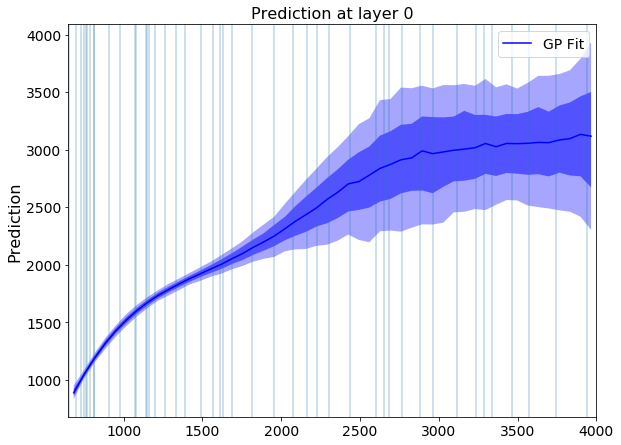

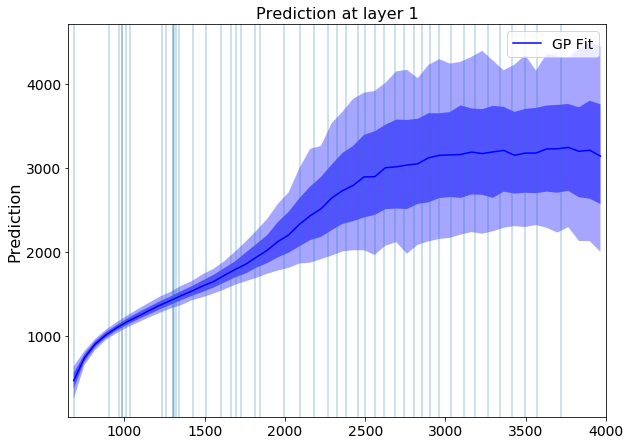

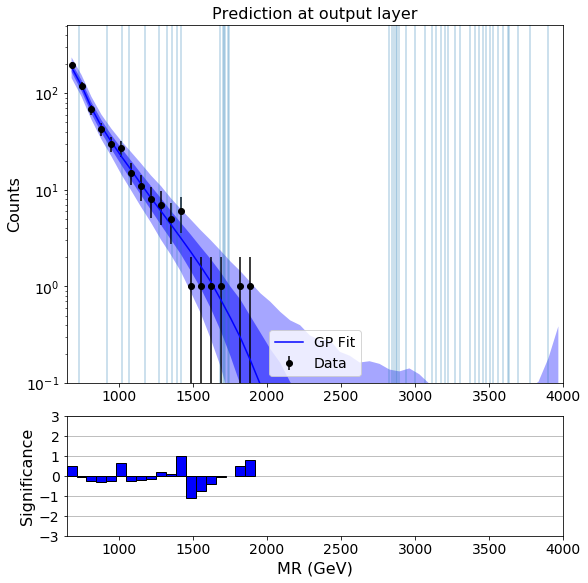

In [5]:
plot_deep_GP(G_sj2b, box, btags, num_mr_bins, mr_max, 
             scale=scale, num_samples=10000)

In [6]:
box = 'MultiJet'
btags = 1
num_mr_bins = 50
mr_max = 1800
k_ell = 1
k_alpha = 150
steps = 2000
lr = 0.01
verbose = True
print_every = 100
num_layers = 2
clip = 0.1
scale = 0.001

G_mj1b = run_deep_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, num_layers,
                      verbose=verbose, print_every=print_every, 
                      clip=clip, scale=scale)

Iteration 0: -ELBO = 3156.246
Iteration 100: -ELBO = -16769.188
Iteration 200: -ELBO = -16916.580
Iteration 300: -ELBO = -16982.100
Iteration 400: -ELBO = -16988.922
Iteration 500: -ELBO = -16978.492
Iteration 600: -ELBO = -16993.076
Iteration 700: -ELBO = -16984.244
Iteration 800: -ELBO = -16988.283
Iteration 900: -ELBO = -16996.348
Iteration 1000: -ELBO = -16989.076
Iteration 1100: -ELBO = -16986.830
Iteration 1200: -ELBO = -17007.262
Iteration 1300: -ELBO = -16995.496
Iteration 1400: -ELBO = -17005.381
Iteration 1500: -ELBO = -16996.271
Iteration 1600: -ELBO = -16993.596
Iteration 1700: -ELBO = -16998.158
Iteration 1800: -ELBO = -16990.303
Iteration 1900: -ELBO = -16994.389
Final loss = -16999.863


In [7]:
G_mj1b.fit(4000)

Iteration 0: -ELBO = -17003.322
Iteration 100: -ELBO = -16996.959
Iteration 200: -ELBO = -16995.096
Iteration 300: -ELBO = -16992.562
Iteration 400: -ELBO = -16992.285
Iteration 500: -ELBO = -16998.342
Iteration 600: -ELBO = -17006.373
Iteration 700: -ELBO = -16998.873
Iteration 800: -ELBO = -16999.881
Iteration 900: -ELBO = -16999.354
Iteration 1000: -ELBO = -17006.602
Iteration 1100: -ELBO = -16989.744
Iteration 1200: -ELBO = -16999.705
Iteration 1300: -ELBO = -16990.729
Iteration 1400: -ELBO = -16998.822
Iteration 1500: -ELBO = -17002.891
Iteration 1600: -ELBO = -17005.154
Iteration 1700: -ELBO = -16992.215
Iteration 1800: -ELBO = -17008.193
Iteration 1900: -ELBO = -16986.162
Iteration 2000: -ELBO = -17002.303
Iteration 2100: -ELBO = -17007.367
Iteration 2200: -ELBO = -16998.822
Iteration 2300: -ELBO = -16999.820
Iteration 2400: -ELBO = -17004.951
Iteration 2500: -ELBO = -17005.205
Iteration 2600: -ELBO = -17003.184
Iteration 2700: -ELBO = -17008.697
Iteration 2800: -ELBO = -17001.7

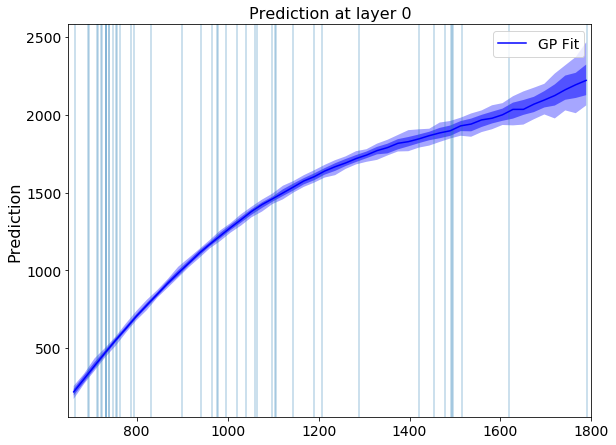

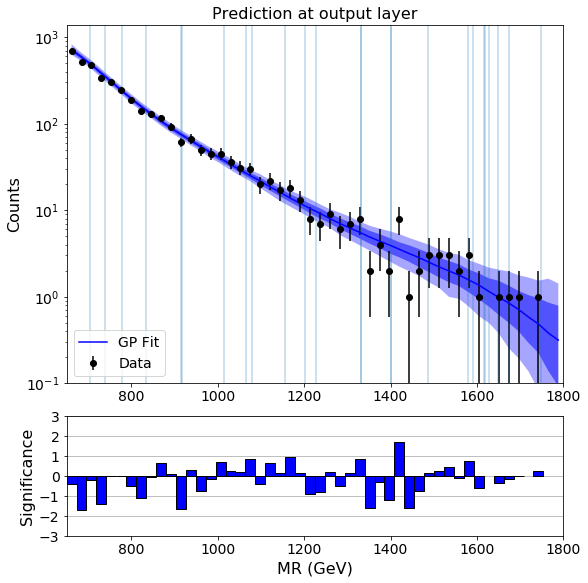

In [8]:
plot_deep_GP(G_mj1b, box, btags, num_mr_bins, mr_max, num_samples=1000,
            scale=scale)

In [66]:
box = 'MultiJet'
btags = 1
num_mr_bins = 50
mr_max = 1800
k_ell = 1
k_alpha = 150
steps = 2000
lr = 0.01
verbose = True
print_every = 100
num_layers = 5
clip = 0.1
scale = 0.001

G_mj1b = run_deep_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, num_layers,
                      verbose=verbose, print_every=print_every, 
                      clip=clip, scale=scale)

Iteration 0: -ELBO = 3952.859
Iteration 100: -ELBO = -16313.897
Iteration 200: -ELBO = -16640.531
Iteration 300: -ELBO = -16742.777
Iteration 400: -ELBO = -16867.531
Iteration 500: -ELBO = -16859.438
Iteration 600: -ELBO = -16896.131
Iteration 700: -ELBO = -16880.203
Iteration 800: -ELBO = -16873.340
Iteration 900: -ELBO = -16857.094
Iteration 1000: -ELBO = -16873.701
Iteration 1100: -ELBO = -16887.359
Iteration 1200: -ELBO = -16840.418
Iteration 1300: -ELBO = -16874.010
Iteration 1400: -ELBO = -16881.488
Iteration 1500: -ELBO = -16787.881
Iteration 1600: -ELBO = -16855.982
Iteration 1700: -ELBO = -16814.625
Iteration 1800: -ELBO = -16874.088
Iteration 1900: -ELBO = -16853.031
Final loss = -16862.158


In [67]:
G_mj1b.fit(1000)

Iteration 0: -ELBO = -16884.699
Iteration 100: -ELBO = -16847.016
Iteration 200: -ELBO = -16900.924
Iteration 300: -ELBO = -16893.746
Iteration 400: -ELBO = -16890.045
Iteration 500: -ELBO = -16857.385
Iteration 600: -ELBO = -16872.100
Iteration 700: -ELBO = -16879.072
Iteration 800: -ELBO = -16876.283
Iteration 900: -ELBO = -16886.402
Final loss = -16892.445


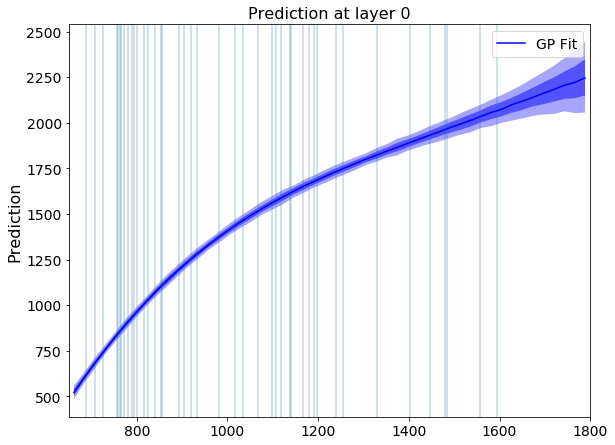

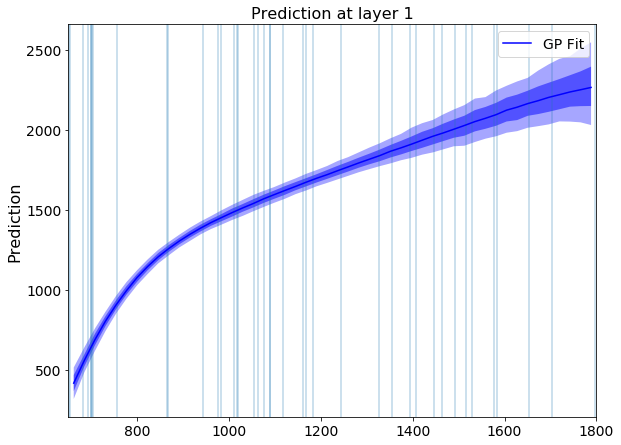

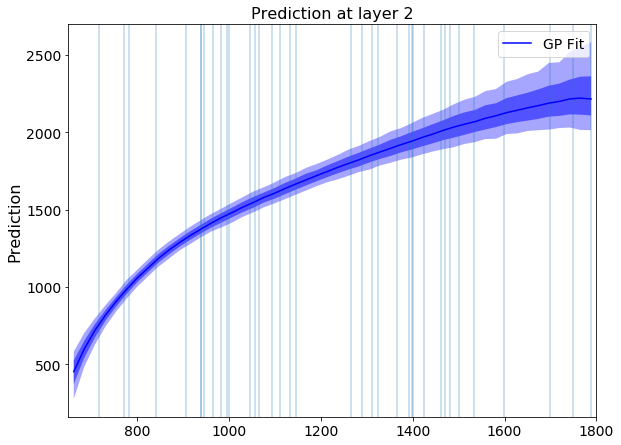

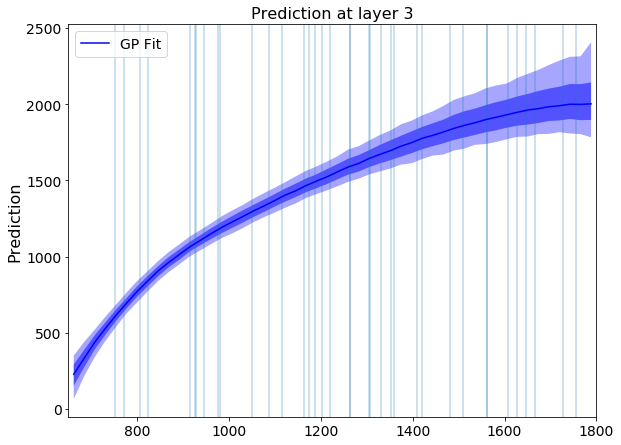

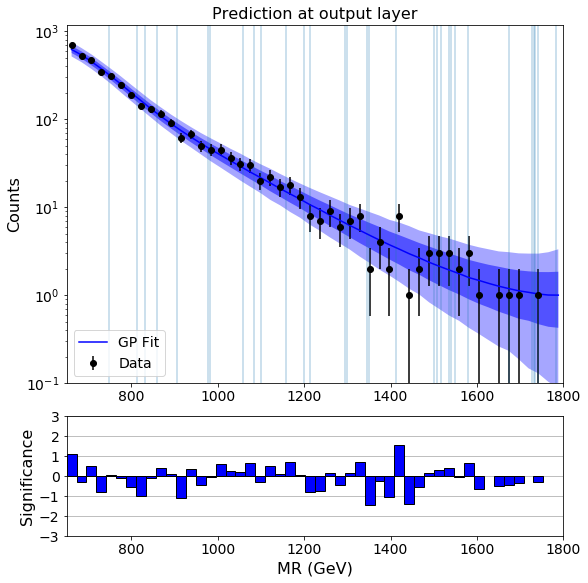

In [68]:
plot_deep_GP(G_mj1b, box, btags, num_mr_bins, mr_max, num_samples=20000,
            scale=scale)

In [69]:
box = 'LeptonSevenJet'
btags = 1
num_mr_bins = 50
mr_max = 4000
k_ell = 1
k_alpha = 100
steps = 1000
lr = 0.01
verbose = True
print_every = 100
num_layers = 3
scale = 0.001

G_lsj2b = run_deep_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, num_layers,
                      verbose=verbose, print_every=print_every, 
                      scale=scale)

Iteration 0: -ELBO = 99119.555
Iteration 100: -ELBO = 351.991
Iteration 200: -ELBO = 99.406
Iteration 300: -ELBO = 26.872
Iteration 400: -ELBO = 13.028
Iteration 500: -ELBO = 11.435
Iteration 600: -ELBO = 15.268
Iteration 700: -ELBO = 5.916
Iteration 800: -ELBO = 77.817
Iteration 900: -ELBO = 7.054
Final loss = 6.636


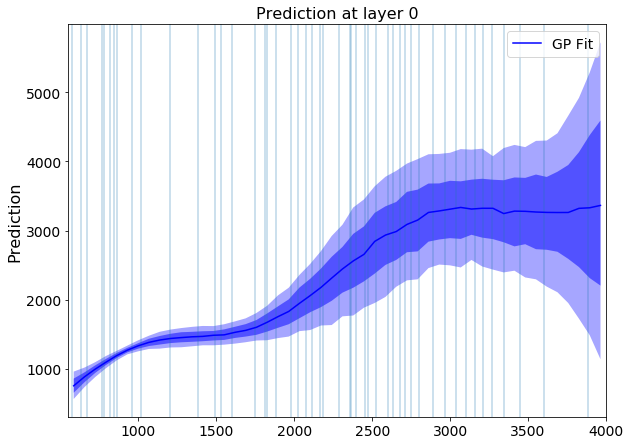

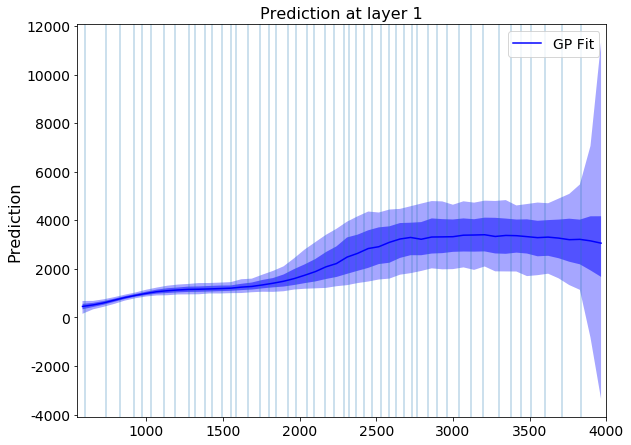

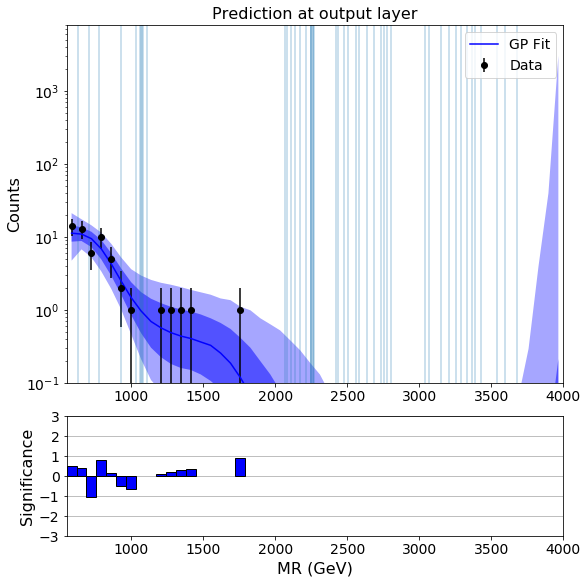

In [70]:
plot_deep_GP(G_lsj2b, box, btags, num_mr_bins, mr_max, num_samples=10000,
            scale=scale)

In [71]:
box = 'DiJet'
btags = 0
num_mr_bins = 50
mr_max = 2000
k_ell = 1
k_alpha = 100
steps = 1000
lr = 0.01
verbose = True
print_every = 100
num_layers = 3
scale = 0.001

G_dj0b = run_deep_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, num_layers,
                      verbose=verbose, print_every=print_every, 
                      scale=scale)

Iteration 0: -ELBO = 105205.953
Iteration 100: -ELBO = -957.535
Iteration 200: -ELBO = -1150.185
Iteration 300: -ELBO = -1242.634
Iteration 400: -ELBO = -1256.590
Iteration 500: -ELBO = -1251.635
Iteration 600: -ELBO = -1260.480
Iteration 700: -ELBO = -1254.611
Iteration 800: -ELBO = -1258.483
Iteration 900: -ELBO = -1262.447
Final loss = -1264.053


In [72]:
G_dj0b.fit(10000)

Iteration 0: -ELBO = -1259.730
Iteration 100: -ELBO = -1266.877
Iteration 200: -ELBO = -1256.141
Iteration 300: -ELBO = -1248.560
Iteration 400: -ELBO = -1260.107
Iteration 500: -ELBO = -1253.381
Iteration 600: -ELBO = -1260.884
Iteration 700: -ELBO = -1257.157
Iteration 800: -ELBO = -1261.895
Iteration 900: -ELBO = -1261.476
Iteration 1000: -ELBO = -1258.485
Iteration 1100: -ELBO = -1258.826
Iteration 1200: -ELBO = -1260.060
Iteration 1300: -ELBO = -1255.836
Iteration 1400: -ELBO = -1018.127
Iteration 1500: -ELBO = -1254.053
Iteration 1600: -ELBO = -1262.235
Iteration 1700: -ELBO = -1246.900
Iteration 1800: -ELBO = -1256.965
Iteration 1900: -ELBO = -1258.565
Iteration 2000: -ELBO = -1258.651
Iteration 2100: -ELBO = -1260.970
Iteration 2200: -ELBO = -1256.147
Iteration 2300: -ELBO = -1254.435
Iteration 2400: -ELBO = -1262.778
Iteration 2500: -ELBO = -1258.058
Iteration 2600: -ELBO = -1263.922
Iteration 2700: -ELBO = -1259.907
Iteration 2800: -ELBO = -1261.919
Iteration 2900: -ELBO = -1

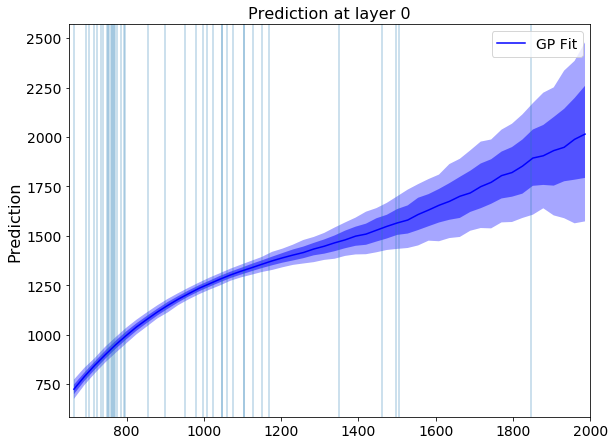

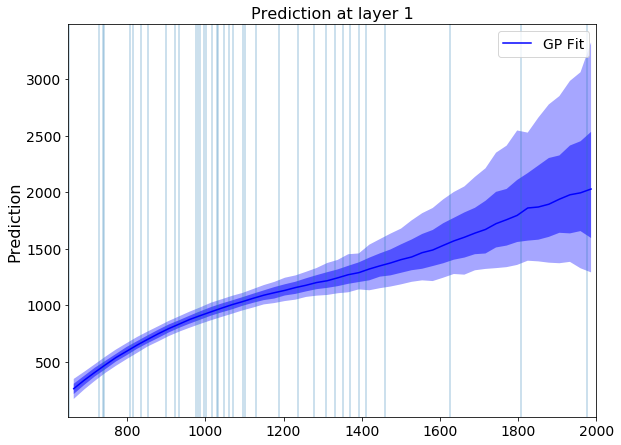

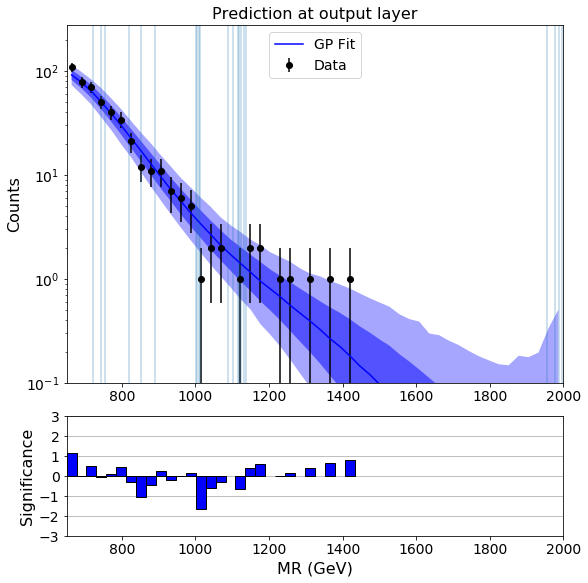

In [73]:
plot_deep_GP(G_dj0b, box, btags, num_mr_bins, mr_max, num_samples=10000,
            scale=scale)

In [9]:
box = 'DiJet'
btags = 1
num_mr_bins = 50
mr_max = 2000
k_ell = 1
k_alpha = 100
steps = 1000
lr = 0.01
verbose = True
print_every = 100
num_layers = 3
scale = 0.001

G_dj1b = run_deep_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, num_layers,
                      verbose=verbose, print_every=print_every, 
                      scale=scale)

Iteration 0: -ELBO = 94991.625
Iteration 100: -ELBO = -1905.945
Iteration 200: -ELBO = -2072.163
Iteration 300: -ELBO = -2208.276
Iteration 400: -ELBO = -2204.959
Iteration 500: -ELBO = -2215.907
Iteration 600: -ELBO = -2212.670
Iteration 700: -ELBO = -2209.719
Iteration 800: -ELBO = -2230.601
Iteration 900: -ELBO = -2232.991
Final loss = -2226.072


In [10]:
G_dj1b.fit(2000)

Iteration 0: -ELBO = -2229.726
Iteration 100: -ELBO = -2231.136
Iteration 200: -ELBO = -2214.291
Iteration 300: -ELBO = -2225.090
Iteration 400: -ELBO = -2218.586
Iteration 500: -ELBO = -2228.880
Iteration 600: -ELBO = -2227.374
Iteration 700: -ELBO = -2227.830
Iteration 800: -ELBO = -2225.542
Iteration 900: -ELBO = -2222.489
Iteration 1000: -ELBO = -2221.604
Iteration 1100: -ELBO = -2216.699
Iteration 1200: -ELBO = -2223.661
Iteration 1300: -ELBO = -2222.921
Iteration 1400: -ELBO = -2202.357
Iteration 1500: -ELBO = -2234.255
Iteration 1600: -ELBO = -2226.787
Iteration 1700: -ELBO = -2221.952
Iteration 1800: -ELBO = -2229.286
Iteration 1900: -ELBO = -2221.523
Final loss = -2209.956


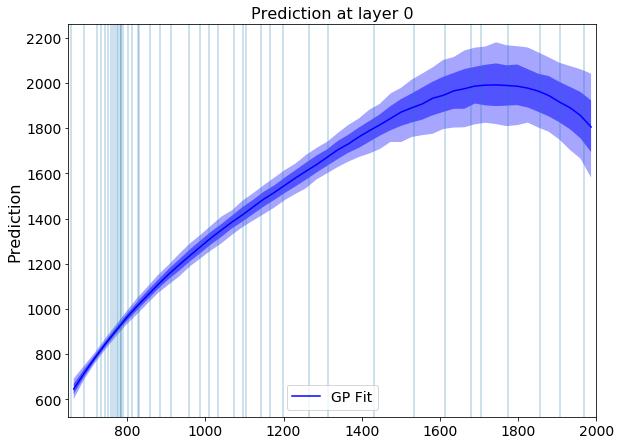

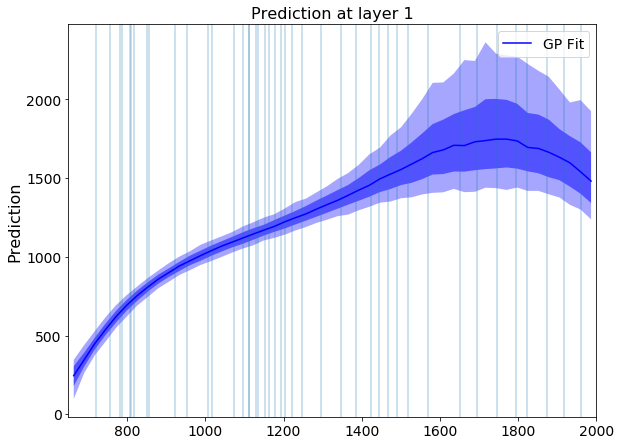

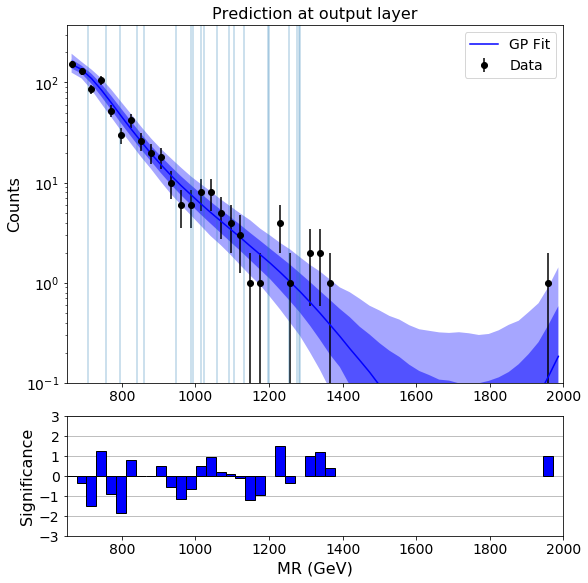

In [11]:
plot_deep_GP(G_dj1b, box, btags, num_mr_bins, mr_max, num_samples=10000,
            scale=scale)

In [13]:
box = 'MultiJet'
btags = 2
num_mr_bins = 50
mr_max = 4000
k_ell = 1
k_alpha = 100
steps = 3000
lr = 0.01
verbose = True
print_every = 100
num_layers = 3
scale = 0.001

G_mj2b = run_deep_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, num_layers,
                      verbose=verbose, print_every=print_every, 
                      scale=scale)

Iteration 0: -ELBO = 20835.498
Iteration 100: -ELBO = -11107.387
Iteration 200: -ELBO = -11323.106
Iteration 300: -ELBO = -11409.271
Iteration 400: -ELBO = -11406.312
Iteration 500: -ELBO = -11447.969
Iteration 600: -ELBO = -11455.576
Iteration 700: -ELBO = -11443.036
Iteration 800: -ELBO = -11460.220
Iteration 900: -ELBO = -11432.007
Iteration 1000: -ELBO = -11466.627
Iteration 1100: -ELBO = -11467.138
Iteration 1200: -ELBO = -11458.718
Iteration 1300: -ELBO = -11464.494
Iteration 1400: -ELBO = -11443.562
Iteration 1500: -ELBO = -11468.666
Iteration 1600: -ELBO = -11460.587
Iteration 1700: -ELBO = -11460.347
Iteration 1800: -ELBO = -11475.300
Iteration 1900: -ELBO = -11239.502
Iteration 2000: -ELBO = -11460.619
Iteration 2100: -ELBO = -11466.704
Iteration 2200: -ELBO = -11432.062
Iteration 2300: -ELBO = -11446.305
Iteration 2400: -ELBO = -11473.415
Iteration 2500: -ELBO = -11444.015
Iteration 2600: -ELBO = -11463.979
Iteration 2700: -ELBO = -11461.656
Iteration 2800: -ELBO = -11452.08

In [17]:
G_mj2b.fit(1000)

Iteration 0: -ELBO = -11468.026
Iteration 100: -ELBO = -11452.131
Iteration 200: -ELBO = -11462.282
Iteration 300: -ELBO = -11469.622
Iteration 400: -ELBO = -11470.736
Iteration 500: -ELBO = -11448.023
Iteration 600: -ELBO = -11466.653
Iteration 700: -ELBO = -11457.190
Iteration 800: -ELBO = -11457.233
Iteration 900: -ELBO = -11461.809
Final loss = -11451.769


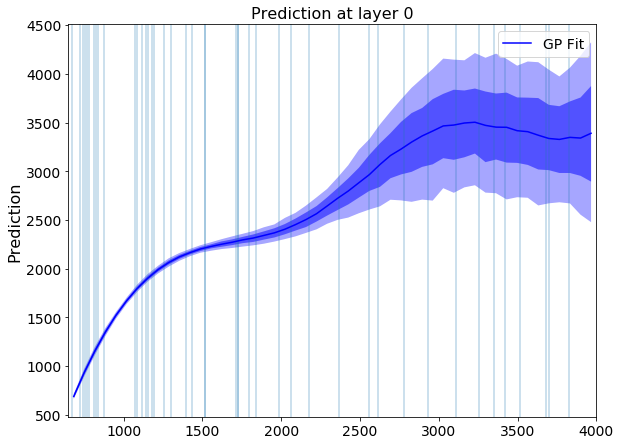

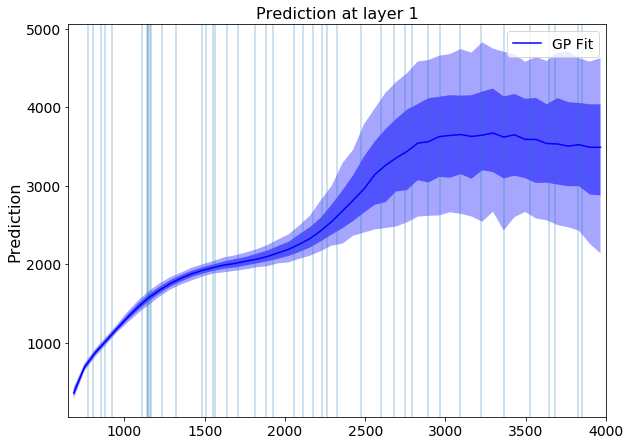

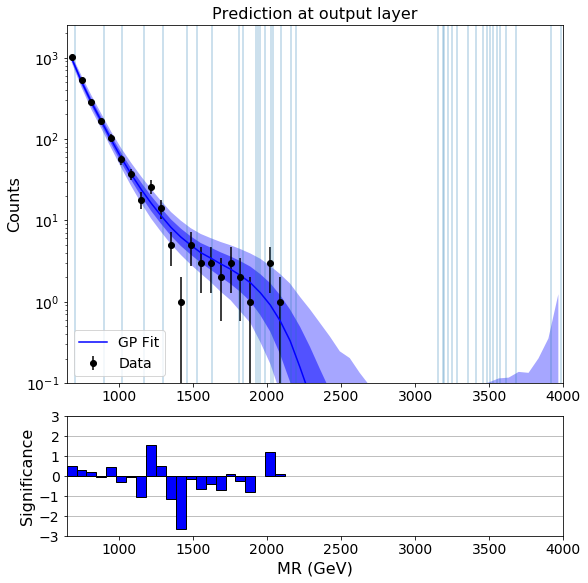

In [18]:
plot_deep_GP(G_mj2b, box, btags, num_mr_bins, mr_max, num_samples=10000,
            scale=scale)